### Linear Regression

Defining a linear regression in simple terms, is the approximation of a linear model used to describe the relationship between two or more variables. In a simple linear regression there are two variables, the dependent variable, which can be seen as the "state" or "final goal" that we study and try to predict, and the independent variables, also known as explanatory variables, which can be seen as the "causes" of the "states".

When more than one independent variable is present the process is called multiple linear regression.
When multiple dependent variables are predicted the process is known as multivariate linear regression.
The equation of a simple linear model is

                                                        𝑌=𝑎𝑋+𝑏
 
Where Y is the dependent variable and X is the independent variable, and a and b being the parameters we adjust. a is known as "slope" or "gradient" and b is the "intercept". You can interpret this equation as Y being a function of X, or Y being dependent on X.

If you plot the model, you will see it is a line, and by adjusting the "slope" parameter you will change the angle between the line and the independent variable axis, and the "intercept parameter" will affect where it crosses the dependent variable's axis.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
if not tf.__version__ == '2.3.0':
    print(tf.__version__)
    raise ValueError('please upgrade to TensorFlow 2.3.0, or restart your Kernel (Kernel->Restart & Clear Output)')

In [3]:
X = np.arange(0.0, 5.0, 0.1)

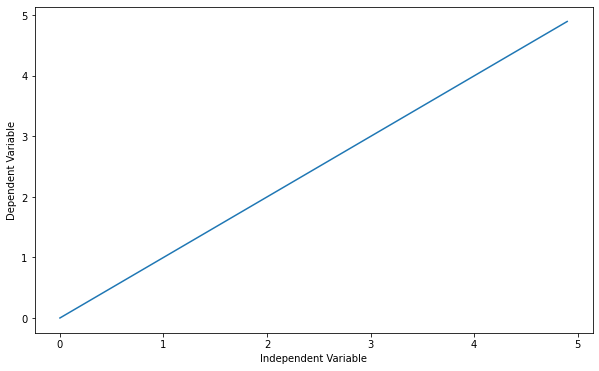

In [4]:
a = 1
b = 0

Y = a * X + b

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Here we will use a sample dataset, and then we'll use TensorFlow to adjust and get the right parameters.

In [5]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets say we want to use linear regression to predict Co2Emission of cars based on their engine size. So, lets define X and Y value for the linear regression, that is, train_x and train_y:

In [6]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

First, we initialize the variables a and b, with any random guess, and then we define the linear function, (the equation of a simple linear model is 𝑌=𝑎𝑋+𝑏)

In [7]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)

def h(x):
    y = a * x + b
    return y

Now, we are going to define a **loss function** for our regression, so we can train our model to better fit our data. In a linear regression, we minimize the squared error of the difference between the predicted values(obtained from the equation) and the target values (the data that we have). In other words we want to minimize the square of the predicted values minus the target value. So we define the equation to be minimized as loss.

To find value of our loss, we use `tf.reduce_mean()`. This function finds the mean of a multidimensional tensor, and the result can have a different dimension.

In [8]:
def loss_object(y, train_y):
    return tf.reduce_mean(tf.square(y - train_y))

 Below is a predefined method offered by TensorFlow to calculate loss function:
 
`loss_object = tf.keras.losses.MeanSquaredLogarithmicError()`


Now we are ready to start training and run the graph. We use GradientTape to calculate gradients. `tf.GradientTape` allows us to track TensorFlow computations and calculate gradients with respect to some given variables.
By default, GradientTape doesn’t track constants, so we must instruct it to with: `tape.watch(variable)`. Then we can perform some computation on the variables we are watching. The computation can be anything from cubing it, x^3, to passing it through a neural network. 
We calculate gradients of a calculation with `tape.gradient(target, sources)`. Note, `tape.gradient` returns an `EagerTensor` that you can convert to ndarray format with `.numpy()`.
If at any point, we want to use multiple variables in our calculations, all we need to do is give `tape.gradient` a list or tuple of those variables. When we optimize Keras models, we pass `model.trainable_variables` as our variable list.

In [9]:
learning_rate = 0.01
train_data = []
loss_values = []

# steps of looping through all your data to update the parameters
training_epochs = 200

# train model 
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_prediction = h(train_x)
        loss_value = loss_object(train_y, y_prediction)
        loss_values.append(loss_value)
        
        # get gradients
        gradients = tape.gradient(loss_value, [b, a])
        
        # compute and adjust weights
        b.assign_sub(gradients[0] * learning_rate)
        a.assign_sub(gradients[1] * learning_rate)
        if epoch % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])
        
    

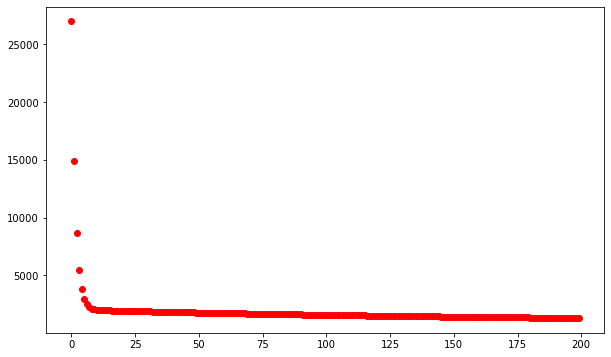

In [10]:
plt.plot(loss_values, 'ro')

Lets visualize how the coefficient and intercept of line has changed to fit the data:

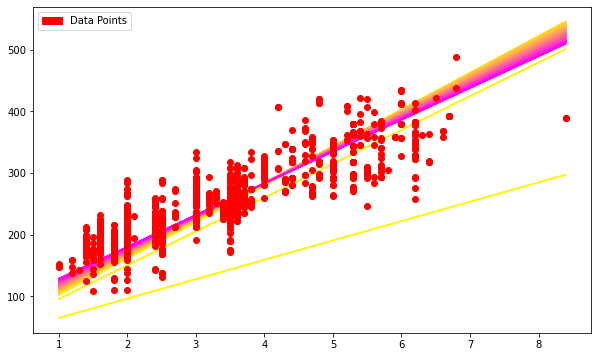

In [11]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: 
        cb = 1.0
    if cg < 0.0: 
        cg = 0.0
    
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')
green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()